In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier                               ### importing libraries
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/nlp/Fake_news_rid.csv 
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/nlp/True_news_rid.csv          ## Getting the .CSV files to read

--2022-04-28 14:03:00--  https://frenzy86.s3.eu-west-2.amazonaws.com/python/nlp/Fake_news_rid.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.148.50
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.148.50|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23875091 (23M) [text/csv]
Saving to: ‘Fake_news_rid.csv’

Fake_news_rid.csv   100%[===================>]  22.77M  12.1MB/s    in 1.9s    

2022-04-28 14:03:02 (12.1 MB/s) - ‘Fake_news_rid.csv’ saved [23875091/23875091]

--2022-04-28 14:03:02--  https://frenzy86.s3.eu-west-2.amazonaws.com/python/nlp/True_news_rid.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.148.50
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.148.50|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23478117 (22M) [text/csv]
Saving t

In [3]:
df1 = pd.read_csv('Fake_news_rid.csv')         # importing the first file
df1

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
8745,The NY Daily News Has Just LITERALLY Told Ted...,"If there s one thing you never do in life, it ...",News,"January 15, 2016"
8746,RNC Leader’s Backstage Rant Shows What The GO...,Footage has been released of a leader of the R...,News,"January 15, 2016"
8747,U.S. Air Force Advertises Martin Luther King ...,Put this one under Shit You Just Can t Make U...,News,"January 15, 2016"
8748,The Winner Of The GOP Debate Is…Bernie Sander...,If a debate is won according to who generates ...,News,"January 15, 2016"


In [4]:
df1['subject'].unique()

array(['News'], dtype=object)

In [5]:
df2 = pd.read_csv('True_news_rid.csv')  # importi the second file
df2

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
8745,White House hopeful Trump nears end of vice pr...,WASHINGTON (Reuters) - Republican Donald Trump...,politicsNews,"July 13, 2016"
8746,"Republicans, Democrats sharply divided over Mu...",NEW YORK (Reuters) - Many Americans view Islam...,politicsNews,"July 15, 2016"
8747,House Speaker Ryan on Pence: 'No better choice',WASHINGTON (Reuters) - U.S. House of Represent...,politicsNews,"July 15, 2016"
8748,Trump's expected VP pick: coal advocate who de...,WASHINGTON/NEW YORK (Reuters) - Republican Don...,politicsNews,"July 14, 2016"


In [6]:
# News = Fake News, politicsNews = True News

In [7]:
frames = [df1, df2]                                       # We can join the two files 

df = pd.concat(frames).reset_index(drop=True)
df

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
17495,White House hopeful Trump nears end of vice pr...,WASHINGTON (Reuters) - Republican Donald Trump...,politicsNews,"July 13, 2016"
17496,"Republicans, Democrats sharply divided over Mu...",NEW YORK (Reuters) - Many Americans view Islam...,politicsNews,"July 15, 2016"
17497,House Speaker Ryan on Pence: 'No better choice',WASHINGTON (Reuters) - U.S. House of Represent...,politicsNews,"July 15, 2016"
17498,Trump's expected VP pick: coal advocate who de...,WASHINGTON/NEW YORK (Reuters) - Republican Don...,politicsNews,"July 14, 2016"


In [8]:
df.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [9]:
df = df.drop(['title', 'date'], axis = 1)                        # Dropping the unnecessary columns
df

,text,subject
0,Donald Trump just couldn t wish all Americans ...,News
1,House Intelligence Committee Chairman Devin Nu...,News
2,"On Friday, it was revealed that former Milwauk...",News
3,"On Christmas day, Donald Trump announced that ...",News
4,Pope Francis used his annual Christmas Day mes...,News
...,...,...
17495,WASHINGTON (Reuters) - Republican Donald Trump...,politicsNews
17496,NEW YORK (Reuters) - Many Americans view Islam...,politicsNews
17497,WASHINGTON (Reuters) - U.S. House of Represent...,politicsNews
17498,WASHINGTON/NEW YORK (Reuters) - Republican Don...,politicsNews


In [10]:
df["subject"] = df["subject"].replace({'News':0,'politicsNews':1}) #0 means fake news 1 means real news
df 


,text,subject
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
17495,WASHINGTON (Reuters) - Republican Donald Trump...,1
17496,NEW YORK (Reuters) - Many Americans view Islam...,1
17497,WASHINGTON (Reuters) - U.S. House of Represent...,1
17498,WASHINGTON/NEW YORK (Reuters) - Republican Don...,1


In [11]:
df['length'] = df['text'].apply(len)         # creating a column with the characters' length of every single string in 'text' column for EDA
df.head()

,text,subject,length
0,Donald Trump just couldn t wish all Americans ...,0,2893
1,House Intelligence Committee Chairman Devin Nu...,0,1898
2,"On Friday, it was revealed that former Milwauk...",0,3597
3,"On Christmas day, Donald Trump announced that ...",0,2774
4,Pope Francis used his annual Christmas Day mes...,0,2346


In [12]:
df['subject'].value_counts()

0    8750
1    8750
Name: subject, dtype: int64

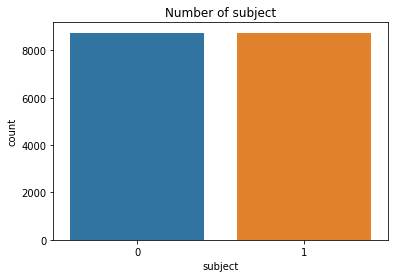

In [13]:
sns.countplot(x='subject',data=df)
plt.xlabel('subject')
plt.title('Number of subject');

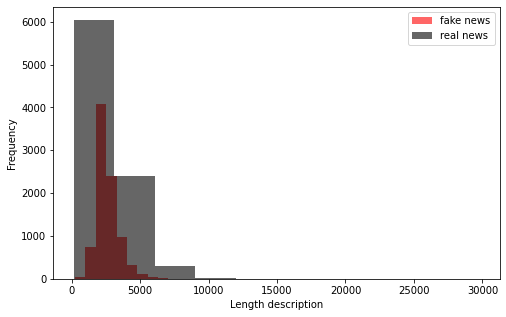

In [14]:
plt.figure(figsize=(8, 5))
df[df.subject == 0].length.plot(bins=35, kind='hist', color='red', label='fake news', alpha=0.6)
df[df.subject == 1].length.plot(kind='hist', color='black', label='real news', alpha=0.6)
plt.legend()
plt.xlabel("Length description");                                                  ### real news text seems to be longer than fake news text, on average.

In [15]:
df['text'].to_list()

Output hidden; open in https://colab.research.google.com to view.

In [16]:
import re

def clean_special_patterns(text):
    """Remove special patterns - email, url, date etc."""
    html_regex = re.compile(r"<.*?>")
    email_regex = re.compile(r"[\w.-]+@[\w.-]+")
    url_regex = re.compile(r"(http|www)[^\s]+")
    date_regex = re.compile(r"[\d]{2,4}[ -/:]*[\d]{2,4}([ -/:]*[\d]{2,4})?") # a way to match date
    new_line = re.compile(r"/(\r\n)+|\r+|\n+|\t+/")
    number = re.compile(r"[\d+]")
    under = re.compile(r"[^a-zA-Z0-9:$-,%.?!]+")
    simbols = re.compile(r"[^\w\s/'/`]")
    spaces = re.compile(r"\s{2,}")
    remove_singlelett= re.compile(r"(^| ).( |$)")

    ## remove
    text = text.lower()
    text = number.sub(" ", text)
    text = html_regex.sub(" ", text)
    text = url_regex.sub(" ", text)
    text = email_regex.sub(" ", text)
    text = date_regex.sub(" ", text)
    text = new_line.sub(" ", text)
    text = under.sub(" ", text)
    text = simbols.sub(" ", text)
    text = spaces.sub(" ", text)
    text = text.replace("`", "'")
    text = remove_singlelett.sub("",text)
    return text

In [17]:
#Applichiamo la funzione di cleaning all in once
df["text"] = df["text"].apply(clean_special_patterns)
df

,text,subject,length
0,donald trump just couldnwish all americanshapp...,0,2893
1,house intelligence committee chairman devin nu...,0,1898
2,on friday it was revealed that former milwauke...,0,3597
3,on christmas day donald trump announced that h...,0,2774
4,pope francis used his annual christmas day mes...,0,2346
...,...,...,...
17495,washington reuters republican donald trump nea...,1,2698
17496,new york reuters many americans view islam unf...,1,3927
17497,washington reuterss house of representatives s...,1,524
17498,washington new york reuters republican donald ...,1,3420


##STOPWORDS + LEMMATIZATION Function with SpaCy

In [18]:
## Spacy Custom Pipeline
import numpy as np
import multiprocessing as mp

import string
import spacy 
from sklearn.base import TransformerMixin, BaseEstimator


nlp = spacy.load("en_core_web_sm")

class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self,
                 nlp = nlp,
                 n_jobs=1):
        """
        Text preprocessing transformer includes steps:
            1. Punctuation removal
            2. Stop words removal
            3. Lemmatization

        nlp  - spacy model
        n_jobs - parallel jobs to run
        """
        self.nlp = nlp
        self.n_jobs = n_jobs

    def fit(self, X, y=None):
        return self

    def transform(self, X, *_):
        X_copy = X.copy()

        partitions = 1
        cores = mp.cpu_count()
        if self.n_jobs <= -1:
            partitions = cores
        elif self.n_jobs <= 0:
            return X_copy.apply(self._preprocess_text)
        else:
            partitions = min(self.n_jobs, cores)

        data_split = np.array_split(X_copy, partitions)
        pool = mp.Pool(cores)
        data = pd.concat(pool.map(self._preprocess_part, data_split))
        pool.close()
        pool.join()

        return data

    def _preprocess_part(self, part):
        return part.apply(self._preprocess_text)

    def _remove_punct(self, doc):
        return (t for t in doc if t.text not in string.punctuation)

    def _remove_stop_words(self, doc):
        return (t for t in doc if not t.is_stop)

    def _lemmatize(self, doc):
        return ' '.join(t.lemma_ for t in doc)

    def _preprocess_text(self, text):
        doc = self.nlp(text)
        removed_punct = self._remove_punct(doc)
        removed_stop_words = self._remove_stop_words(removed_punct)
        return self._lemmatize(removed_stop_words)

In [19]:
text_preprocess = TextPreprocessor(n_jobs=-1)._preprocess_text
df["text"][0:1000].apply(text_preprocess)  #####just testing with 1000 rows, the entire preprocessing would have been longer than 15 minutes
#df["text"] = df["text"].apply(text_preprocess)
df

,text,subject,length
0,donald trump just couldnwish all americanshapp...,0,2893
1,house intelligence committee chairman devin nu...,0,1898
2,on friday it was revealed that former milwauke...,0,3597
3,on christmas day donald trump announced that h...,0,2774
4,pope francis used his annual christmas day mes...,0,2346
...,...,...,...
17495,washington reuters republican donald trump nea...,1,2698
17496,new york reuters many americans view islam unf...,1,3927
17497,washington reuterss house of representatives s...,1,524
17498,washington new york reuters republican donald ...,1,3420


##EDA

In [20]:
cleaned = ' '.join(df['text'].to_list())

(-0.5, 799.5, 399.5, -0.5)

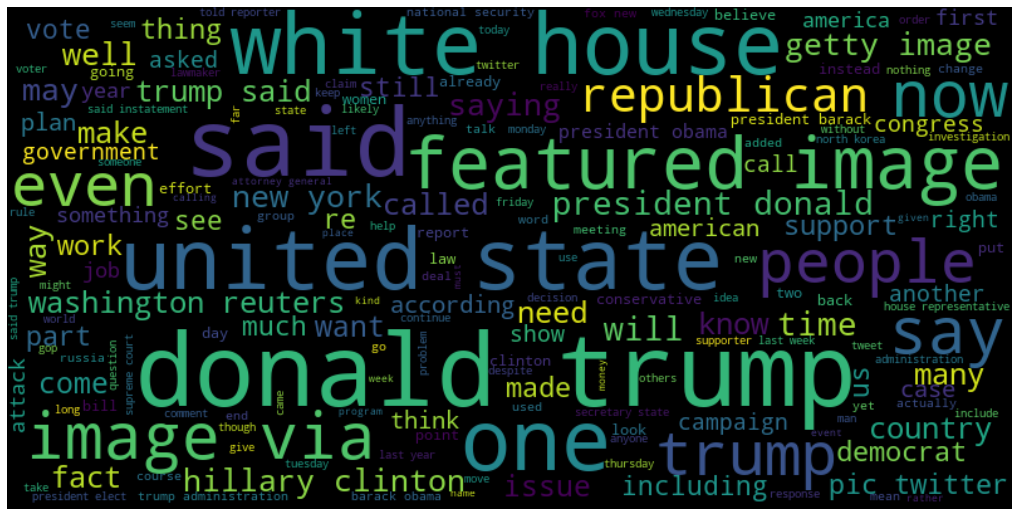

In [21]:
from wordcloud import WordCloud                                       
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color = 'black', width = 800, height = 400,
                      max_words = 180, contour_width = 3,
                      max_font_size = 80, contour_color = 'steelblue',
                      random_state = 667)                                        ####plotting the wordcloud

wordcloud.generate(cleaned)

plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

##BAG OF WORDS

In [22]:
X = df['text'] # FEATURES
y = df['subject'] # TARGET

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7)

X_ = vectorizer.fit_transform(X).toarray()
X_

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 8, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

##TF-IDF

In [24]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidfconverter = TfidfTransformer()
X_ = tfidfconverter.fit_transform(X_).toarray()
X_

array([[0.        , 0.        , 0.        , ..., 0.        , 0.03672394,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.25909346,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [25]:
#We can do the BOW + TF-IDF all in one with TfidfVectorizer

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_, y,
                                                    test_size=0.25, 
                                                    random_state=667
                                                    )

In [27]:
labels = ['News', 'politicsNews']

##RandomForestClassifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=1000, random_state=667,max_depth=5)
classifier.fit(X_train, y_train) 

RandomForestClassifier(max_depth=5, n_estimators=1000, random_state=667)

In [29]:
# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9963428571428572


Text(69.0, 0.5, 'Actual')

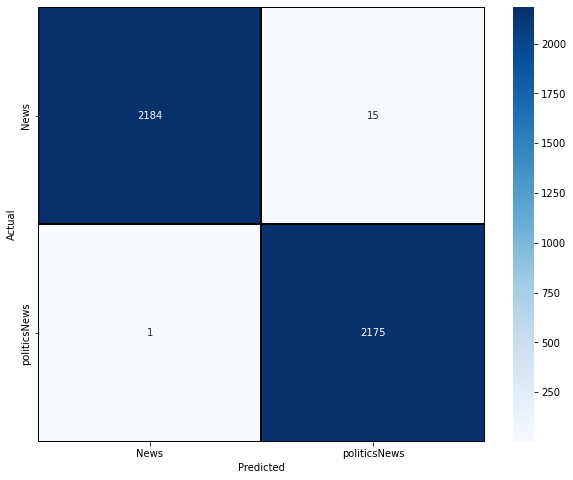

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = labels, 
            yticklabels = labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [31]:
from sklearn.metrics import classification_report
#labels = ['class1', 'class2']
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

        News       1.00      0.99      1.00      2199
politicsNews       0.99      1.00      1.00      2176

    accuracy                           1.00      4375
   macro avg       1.00      1.00      1.00      4375
weighted avg       1.00      1.00      1.00      4375



##ROC Curve

In [32]:
!pip install plot-metric --quiet

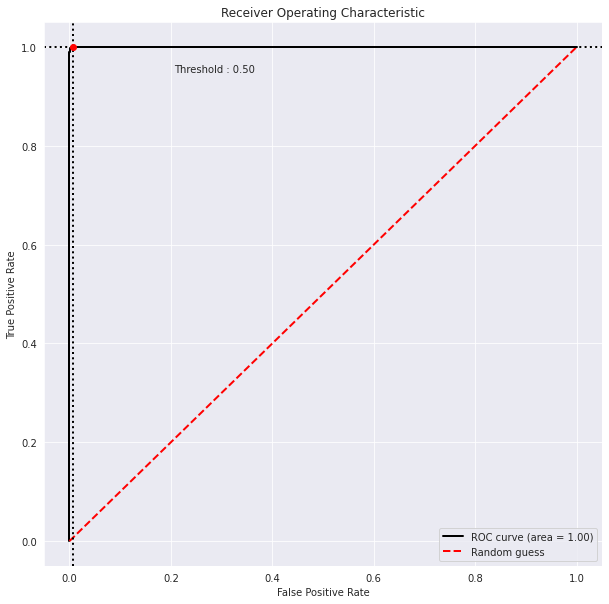

In [33]:
from plot_metric.functions import BinaryClassification
y_pred_proba = classifier.predict_proba(X_test)[::,1]

#labels = ['class1', 'class2']
bc = BinaryClassification(y_test, y_pred_proba, labels=labels)

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve();

##MultinomialNB

In [34]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [35]:
# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9629714285714286


Text(69.0, 0.5, 'Actual')

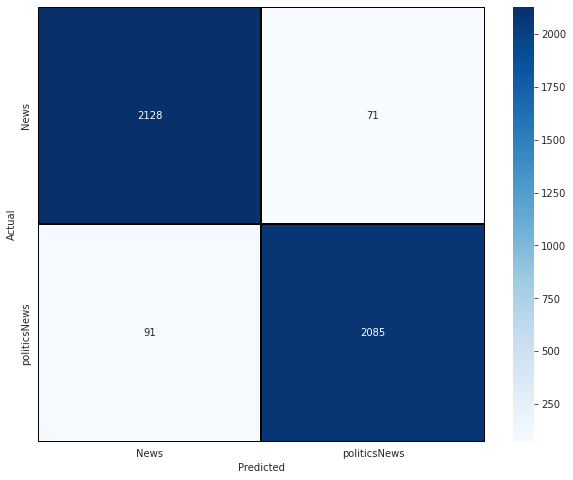

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = labels, 
            yticklabels = labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [37]:
from sklearn.metrics import classification_report
#labels = ['class1', 'class2']
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

        News       0.96      0.97      0.96      2199
politicsNews       0.97      0.96      0.96      2176

    accuracy                           0.96      4375
   macro avg       0.96      0.96      0.96      4375
weighted avg       0.96      0.96      0.96      4375



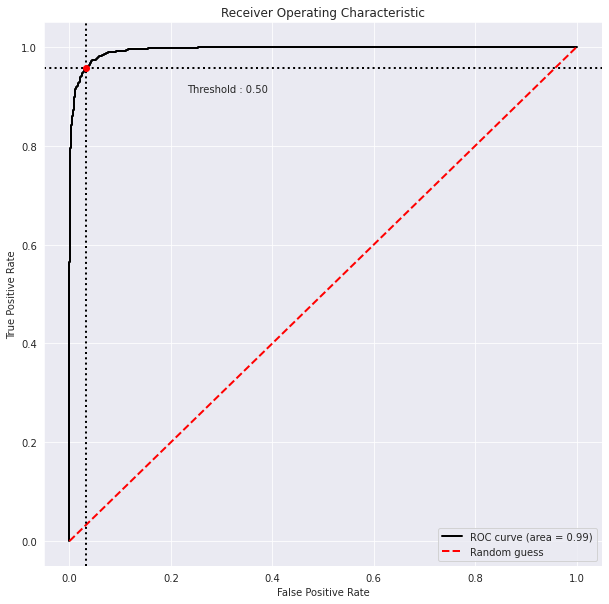

In [38]:
from plot_metric.functions import BinaryClassification
y_pred_proba = classifier.predict_proba(X_test)[::,1]

#labels = ['class1', 'class2']
bc = BinaryClassification(y_test, y_pred_proba, labels=labels)

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve();

##SGDClassifier

In [39]:
# accuracy score on the test data
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier(loss='log', penalty='l2',alpha=1e-3, random_state=667, max_iter=5, tol=None)
classifier.fit(X_train, y_train) 

y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9792


Text(69.0, 0.5, 'Actual')

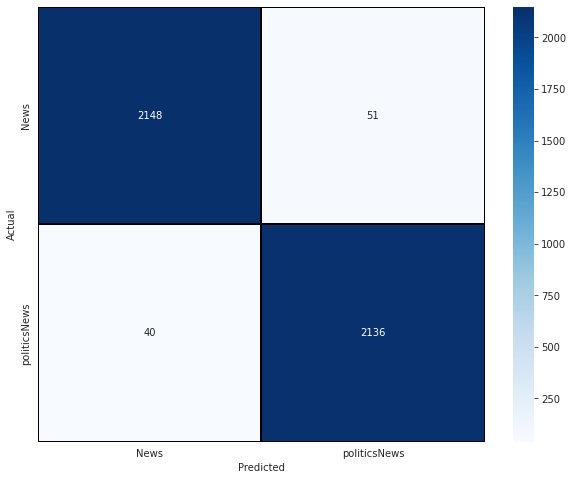

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = labels, 
            yticklabels = labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [41]:
from sklearn.metrics import classification_report
#labels = ['class1', 'class2']
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

        News       0.98      0.98      0.98      2199
politicsNews       0.98      0.98      0.98      2176

    accuracy                           0.98      4375
   macro avg       0.98      0.98      0.98      4375
weighted avg       0.98      0.98      0.98      4375



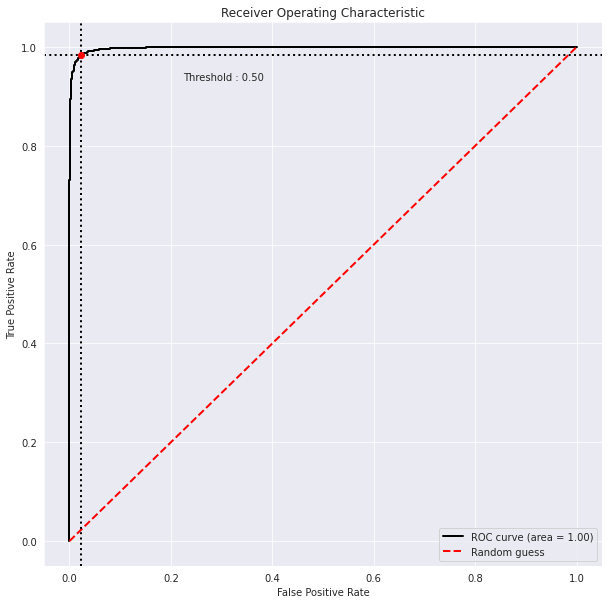

In [42]:
from plot_metric.functions import BinaryClassification
y_pred_proba = classifier.predict_proba(X_test)[::,1]

#labels = ['class1', 'class2']
bc = BinaryClassification(y_test, y_pred_proba, labels=labels)

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve();

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25, 
                                                    random_state=667
                                                    )

In [44]:
#Random Forest Classifier seems to be the best model...

In [45]:
from sklearn.pipeline import Pipeline

text_preprocess = TextPreprocessor(n_jobs=-1)
bow = CountVectorizer(max_features=1500, min_df=5, max_df=0.7)
tfidf = TfidfTransformer()
classifier = RandomForestClassifier(n_estimators=1000, random_state=667,max_depth=5)

pipe = Pipeline([
                ('lemma_stop_rem',text_preprocess),
                ('bow',bow),
                ('tfidf',tfidf),
                ('clf',classifier),
                ])

pipe.fit(X_train, y_train)

predicted = pipe.predict(X_test)
test_data_accuracy = accuracy_score(y_test, predicted)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9945142857142857


In [46]:
# testing prediction with some random text
test = pd.Series({'text':'Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.'})

In [47]:
prediction = pipe.predict(test)
print(prediction[0])

if (prediction[0] == 0):
  print('fake news')
else:
  print('real news')

1
real news


In [48]:
# saving pipeline with .pkl format

import joblib

joblib.dump(pipe,'pipeline_classifier_SpaCy.pkl')

['pipeline_classifier_SpaCy.pkl']

In [49]:
test = pd.read_excel('testnews.xlsx')
test

FileNotFoundError: ignored

In [ ]:
X = test['text']
X

In [ ]:
prediction = pipe.predict(X)
print(prediction[0])

if (prediction[0] == 0):
  print('fake news')
else:
  print('real news')

In [ ]:
test['predicted'] = pipe.predict(X)
test

In [ ]:
test.to_excel( 'text-mining.xlsx', index=False )